In [43]:
import pandas as pd
import os
import numpy as np
import time
import sys
import math
import matplotlib.pyplot as plt
%matplotlib inline
import prettypandas as pp

In [242]:
np.random.seed(1234)

In [243]:
df = pd.read_csv('hour.csv')

In [244]:
df.head()
# season 1--> spring, 2--> summer, 3--> fall, 4--> winter
# year 0--> 2011, 1-->2012
# holiday 1--> yes, 0--> no
# weekday 0--> sunday so on
# workingday 0--> no, 1-->yes
# weather 1--> clear, 2--> mist 3--> light rain 4--> heavy rain
# temp normalized
# atemp --> feels like temperature
# causal + registered = demand

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [245]:
df.shape

(17379, 17)

In [246]:
df.isnull().sum(axis=0)

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [247]:
df.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [248]:
df.info()
pass;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
index         17379 non-null int64
date          17379 non-null object
season        17379 non-null int64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
demand        17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [249]:
df.drop_duplicates(keep='first', inplace=True)

In [250]:
df.shape

(17379, 17)

### Dropped columns

In [251]:
# index, date, casual, registered will be dropped. (We alredy have demand which includes both causual and registered so we can drop those)

In [252]:
cols_to_drop = ['index', 'date', 'casual', 'registered']

In [338]:
bikes_prep = df.copy()

In [339]:
bikes_prep.drop(cols_to_drop, axis=1, inplace=True)

In [340]:
#bikes_prep.pipe(pp.PrettyPandas).style.background_gradient()

In [341]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

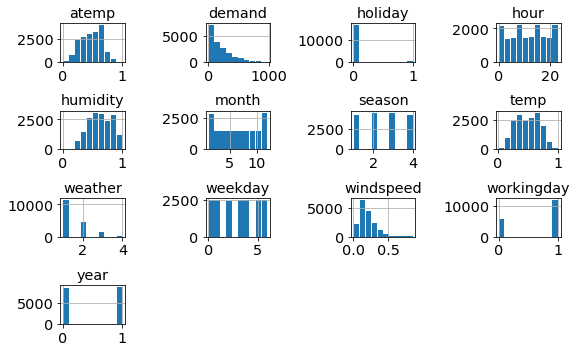

In [342]:
bikes_prep.hist(rwidth=0.9);
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
plt.tight_layout();

### --> Target vraible y (demand) is not normally distributed . So it needs some tranformation

### Visualization of `continuous varibles vs demand`

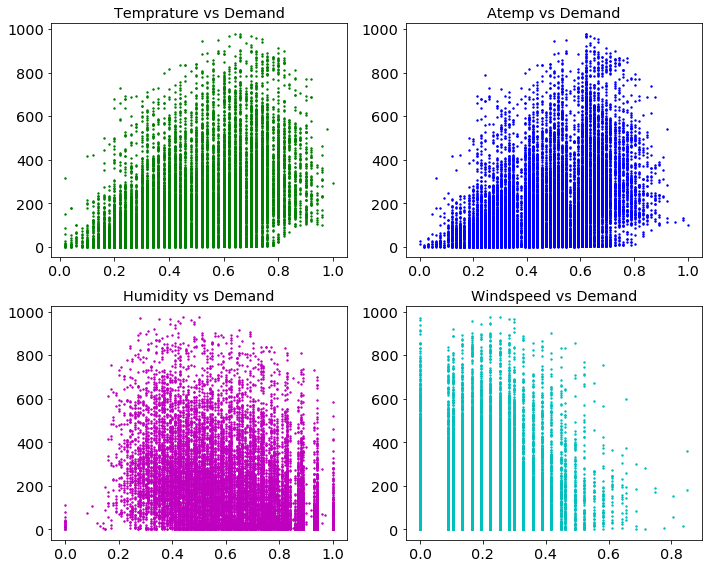

In [343]:
plt.subplot(2,2,1)
plt.title('Temprature vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('Atemp vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()
pass;

#### Visualization of `categorical varibles vs demand`

#### Temperature and aTemperature has a correlation and graps are almost same, we can drop one

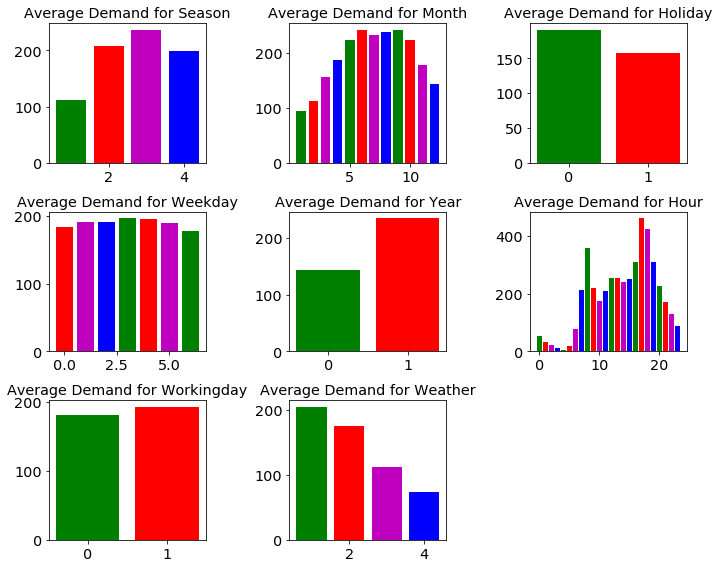

In [344]:
colors = ['g', 'r', 'm', 'b']
categorical_vars = ['season', 'month', 'holiday', 'weekday', 'year', 'hour', 'workingday',  'weather', ]

for index, value in enumerate(categorical_vars):

    plt.subplot(3,3,index+1)
    plt.title(f'Average Demand for {value.title()}')
    cat_list = bikes_prep[value].unique()
    cat_average = bikes_prep.groupby(value)['demand'].mean()
    plt.bar(cat_list, cat_average, color=colors);
    
plt.tight_layout();

#### `Weekday` can be dropped because there is no significant chnages between day of the week
#### we'll drop `year` as well, we have only 2 year's data and don;t know how it is gonna efect 5 or 6 years down the line
#### `working` day can be also drop becasue it is almost the same so does not contribute for prediction of y

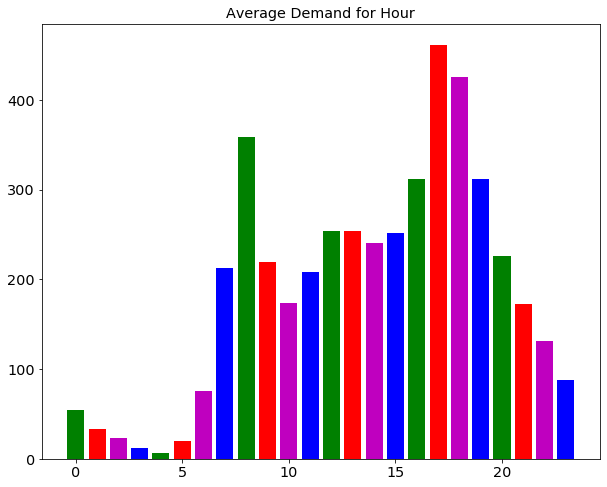

In [345]:
plt.title('Average Demand for Hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors);

### Check for outliers

In [346]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [347]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

## Check the multiple linear regression assumptions

### 1) Linearity using correlation coefficient matrix using corr

In [348]:
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


#### we can drop `atemp` cuz it derives from temp and has a very positive correlation almost 1
#### we can drop windspeed which has almost no correlaton with demand 

#### those columns will be dropped --> `['atemp', 'windspeed', 'workingday', 'weekday', 'year']`

In [349]:
bikes_prep.drop(['atemp', 'windspeed', 'workingday', 'weekday', 'year'], axis=1, inplace=True)

In [350]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


### 2) Autocorrelation of Demand using acor

for acor values must be `float not integer`

In [351]:
df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')

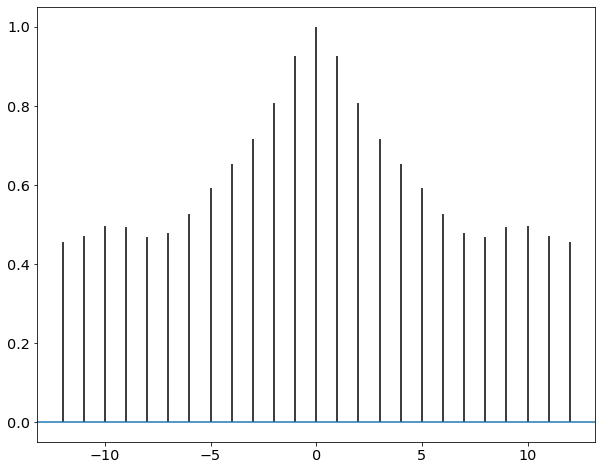

In [352]:
plt.acorr(df1, maxlags=12);
# we see that there is very high correlation up to 3 months (look at center 0 and check -+ 3 months)

In [353]:
# There is high autocorrelation for "demand" particularly 3 months

#### Log Normalize the feature `"Demand" (Target)`

In [354]:
df1['demand'] = bikes_prep['demand'].map(np.log)

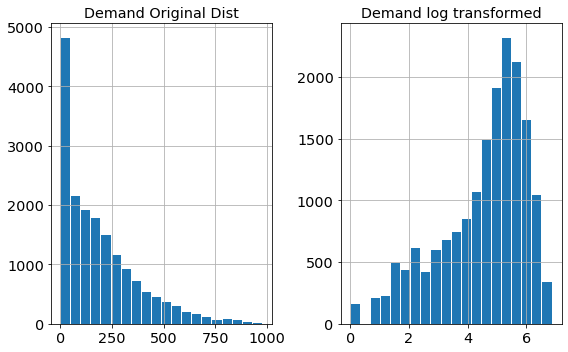

In [355]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
plt.subplot(1,2,1)
bikes_prep['demand'].hist(rwidth=0.9, bins=20);
plt.title('Demand Original Dist')

plt.subplot(1,2,2)
df1['demand'].hist(rwidth=0.9, bins=20);
plt.title('Demand log transformed')

plt.tight_layout();

In [380]:
 bikes_prep['demand'] = bikes_prep['demand'].map(np.log)

#### We have now more normally distributed Demand

### Dealing with autocorrelation

In [381]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

In [382]:
t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

In [383]:
t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

In [384]:
bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

In [385]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


#### We will drop the lines with NaN

In [386]:
bikes_prep_lag.dropna(inplace=True)

In [387]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [388]:
bikes_prep_lag.reset_index(inplace=True, drop=True)

In [389]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
1,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
2,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
3,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
4,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


### Creating dummy variables

In [390]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [391]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

In [392]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [393]:
bikes_prep_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
0,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data

In [394]:
# If you have time dependent data such as our case now, we can not randomly split train test split the data
# We should keep the time integrity of the data so either we should get the start of the dat or end of the data to test

In [395]:
# ----------------------------------------------------------
# Step 8 - Create Train and test split
# ----------------------------------------------------------

# Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)
#
# Demand is time-series type of data

Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

train_size = 0.7 * len(X)
train_size = int(tr_size)

X_train = X.values[0 : train_size]
X_test = X.values[train_size : len(X)]

y_train = Y.values[0 : tr_size]
y_test = Y.values[train_size : len(Y)]

### Linear Regression

In [396]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

r2_train = lin_reg.score(X_train, y_train) # r squared value
r2_test = lin_reg.score(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [397]:
r2_train
r2_test

0.9195240591465778

0.9287151360253384

In [398]:
y_pred = lin_reg.predict(X_test)

In [399]:
from sklearn.metrics import mean_squared_error

In [400]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

In [401]:
bikes_prep_lag['demand'].max()

6.884486652042782

In [402]:
rmse

0.3809880049817047

### Calculate RMSLE and compare results
##### Exponent opposite to log

In [403]:
y_test_e = []
y_pred_e = []

In [407]:
for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_pred_e.append(math.exp(y_pred[i]))

In [413]:
# Calculate RMSLE and compare results
# Exponent opposite to log

y_test_e = []
y_pred_e = []

for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_pred_e.append(math.exp(y_pred[i]))

log_sq_sum = 0.0

for i in range(0, len(y_test_e)):
    log_a = math.log(y_test_e[i] + 1)
    log_p = math.log(y_pred_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(y_test))

print(rmsle)

0.35609417069802124
